In [1]:
import sys
# append the path of the parent directory
sys.path.append("..")

import torch
import torch.nn as nn
import numpy as np
import random

from model import UNet, Complex_CNN, LargeUNet
from dataset import Debris_State_Pairs_Dataset

from train import Trainer

from torch.optim import Adam
from torch.utils.data import DataLoader, Subset, random_split


In [2]:
def set_seed(seed_value):
    """Set seed for reproducibility."""
    np.random.seed(seed_value)  # NumPy
    torch.manual_seed(seed_value)  # PyTorch
    random.seed(seed_value)  # Python's built-in random module
    
    # minimise non-deterministic GPU behaviour
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Usage
set_seed(42) 

In [3]:
# Parameters

root_dir = 'C:\\Users\\thomas.bush\\repos\\dyna-landslide-surrogate\\data_small'
checkpoint_dir = 'C:\\Users\\thomas.bush\\repos\\dyna-landslide-surrogate\\checkpoints'
batch_size = 64
split_proportions = (0.7, 0.15, 0.15)
epochs = 13

In [4]:
# Data set up

# Initialize dataset with scaling
dataset = Debris_State_Pairs_Dataset(root_dir, array_size=128, apply_scaling=True)

# Split dataset into train, validation, and test sets and create dataloaders
train_loader, val_loader, test_loader = dataset.create_dataloaders(split_proportions, batch_size, random_state=42)

# Compute scaling factors based on the train dataset, but only if scaling is applied
if dataset.apply_scaling:
    train_dataset = train_loader.dataset.dataset 
    dataset.compute_scaling_factors()

# Dataset stats (optional)
print(f"Total dataset size: {len(dataset)}")
print(f"Train size: {len(train_loader.dataset)}, Validation size: {len(val_loader.dataset)}, Test size: {len(test_loader.dataset)}")

Total dataset size: 2297
Train size: 1452, Validation size: 485, Test size: 360


In [5]:
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Training on device: {device}.")

# TO DO - add multu GPU support here

Training on device: cuda.


In [6]:
# List of models to train
# models = [
#     {'model': Complex_CNN(), 'name': 'complex_cnn'},
#     {'model': UNet(), 'name': 'unet'},
#     {'model': LargeUNet(), 'name': 'large_unet'}
# ]

# models = [
#     {'model': Complex_CNN(), 'name': 'complex_cnn'}
# ]

models = [
    {'model': Complex_CNN(), 'name': 'complex_cnn'}, 
    {'model': LargeUNet(), 'name': 'large_unet'},
    {'model': UNet(in_channels=3, out_channels=2), 'name': 'unet'}
]

# models = [
#     {'model': LargeUNet(), 'name': 'large_unet'}
# ]

Training complex_cnn...
Epoch [1/13], Loss: 0.0855
Validation Loss: 0.1039
Epoch [2/13], Loss: 0.0455
Validation Loss: 0.0915
Epoch [3/13], Loss: 0.0400
Validation Loss: 0.0892
Epoch [4/13], Loss: 0.0367
Validation Loss: 0.0818
Epoch [5/13], Loss: 0.0347
Validation Loss: 0.0782
Model saved to C:\Users\thomas.bush\repos\dyna-landslide-surrogate\checkpoints\complex_cnn\model_epoch_5.pth
Losses saved to C:\Users\thomas.bush\repos\dyna-landslide-surrogate\checkpoints\complex_cnn\losses_epoch_5.json
Epoch [6/13], Loss: 0.0331
Validation Loss: 0.0760
Epoch [7/13], Loss: 0.0318
Validation Loss: 0.0808
Epoch [8/13], Loss: 0.0335
Validation Loss: 0.0802
Epoch [9/13], Loss: 0.0332
Validation Loss: 0.0751
Epoch [10/13], Loss: 0.0298
Validation Loss: 0.0797
Model saved to C:\Users\thomas.bush\repos\dyna-landslide-surrogate\checkpoints\complex_cnn\model_epoch_10.pth
Losses saved to C:\Users\thomas.bush\repos\dyna-landslide-surrogate\checkpoints\complex_cnn\losses_epoch_10.json
Epoch [11/13], Loss: 

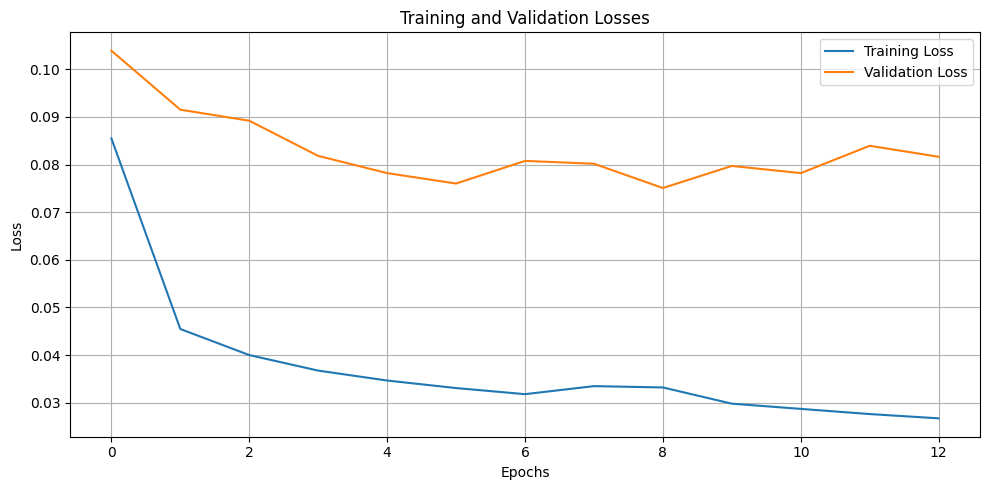

Finished training complex_cnn. Model state saved.
Training large_unet...
Epoch [1/13], Loss: 0.0685
Validation Loss: 0.0476
Epoch [2/13], Loss: 0.0302
Validation Loss: 0.0354
Epoch [3/13], Loss: 0.0249
Validation Loss: 0.0333
Epoch [4/13], Loss: 0.0230
Validation Loss: 0.0325
Epoch [5/13], Loss: 0.0208
Validation Loss: 0.0321
Model saved to C:\Users\thomas.bush\repos\dyna-landslide-surrogate\checkpoints\large_unet\model_epoch_5.pth
Losses saved to C:\Users\thomas.bush\repos\dyna-landslide-surrogate\checkpoints\large_unet\losses_epoch_5.json
Epoch [6/13], Loss: 0.0192
Validation Loss: 0.0322
Epoch [7/13], Loss: 0.0184
Validation Loss: 0.0311
Epoch [8/13], Loss: 0.0177
Validation Loss: 0.0311
Epoch [9/13], Loss: 0.0172
Validation Loss: 0.0312
Epoch [10/13], Loss: 0.0164
Validation Loss: 0.0309
Model saved to C:\Users\thomas.bush\repos\dyna-landslide-surrogate\checkpoints\large_unet\model_epoch_10.pth
Losses saved to C:\Users\thomas.bush\repos\dyna-landslide-surrogate\checkpoints\large_un

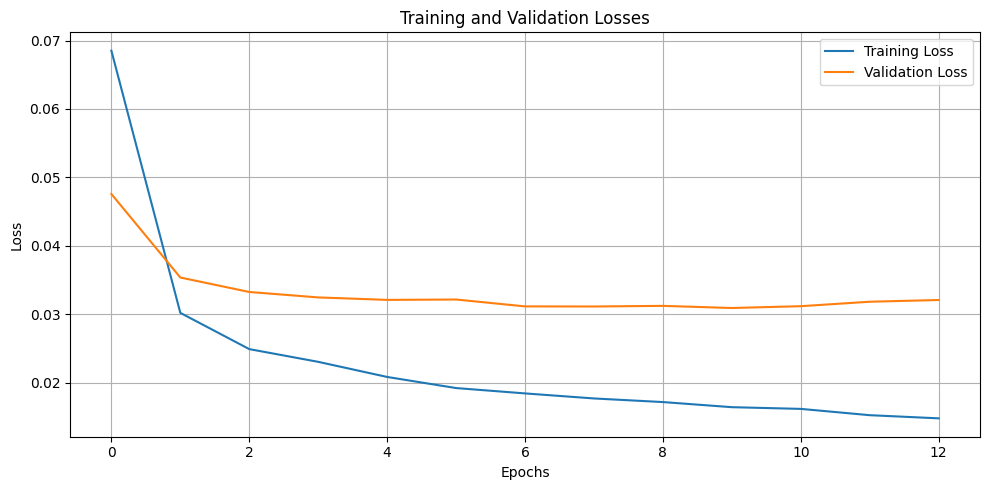

Finished training large_unet. Model state saved.
Training unet...
Epoch [1/13], Loss: 0.0574
Validation Loss: 0.0643
Epoch [2/13], Loss: 0.0339
Validation Loss: 0.0403
Epoch [3/13], Loss: 0.0264
Validation Loss: 0.0359
Epoch [4/13], Loss: 0.0242
Validation Loss: 0.0339
Epoch [5/13], Loss: 0.0224
Validation Loss: 0.0330
Model saved to C:\Users\thomas.bush\repos\dyna-landslide-surrogate\checkpoints\unet\model_epoch_5.pth
Losses saved to C:\Users\thomas.bush\repos\dyna-landslide-surrogate\checkpoints\unet\losses_epoch_5.json
Epoch [6/13], Loss: 0.0204
Validation Loss: 0.0316
Epoch [7/13], Loss: 0.0191
Validation Loss: 0.0312
Epoch [8/13], Loss: 0.0194
Validation Loss: 0.0332
Epoch [9/13], Loss: 0.0175
Validation Loss: 0.0315
Epoch [10/13], Loss: 0.0163
Validation Loss: 0.0319
Model saved to C:\Users\thomas.bush\repos\dyna-landslide-surrogate\checkpoints\unet\model_epoch_10.pth
Losses saved to C:\Users\thomas.bush\repos\dyna-landslide-surrogate\checkpoints\unet\losses_epoch_10.json
Epoch [

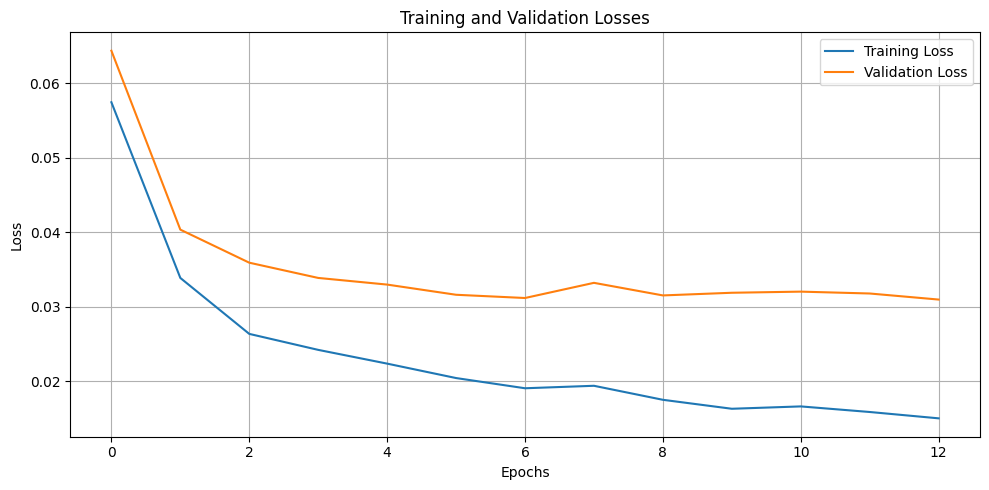

Finished training unet. Model state saved.


In [7]:
# Train each model
for model_info in models:
    
    # # Check if multiple GPUs are available and wrap the model using nn.DataParallel
    # if torch.cuda.device_count() > 1:
    #     print(f"Using {torch.cuda.device_count()} GPUs!")
    #     # This will wrap the model for use with multiple GPUs
    #     model = torch.nn.DataParallel(model)
    
    # Move model to the appropriate device
    model = model_info['model'].to(device)
    
    # Define the loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    
    # Initialize the trainer
    model_name = model_info['name']
    trainer = Trainer(model, optimizer, criterion, device, model_name=model_name, checkpoint_dir=checkpoint_dir)
    
    # Train the model
    print(f"Training {model_name}...")
    trainer.train(train_loader, val_loader, epochs=epochs, checkpoint_interval=5)
    
    print(f"Finished training {model_name}.")

Loss plot saved to C:\Users\thomas.bush\repos\dyna-landslide-surrogate\checkpoints\unet\loss_plot.png


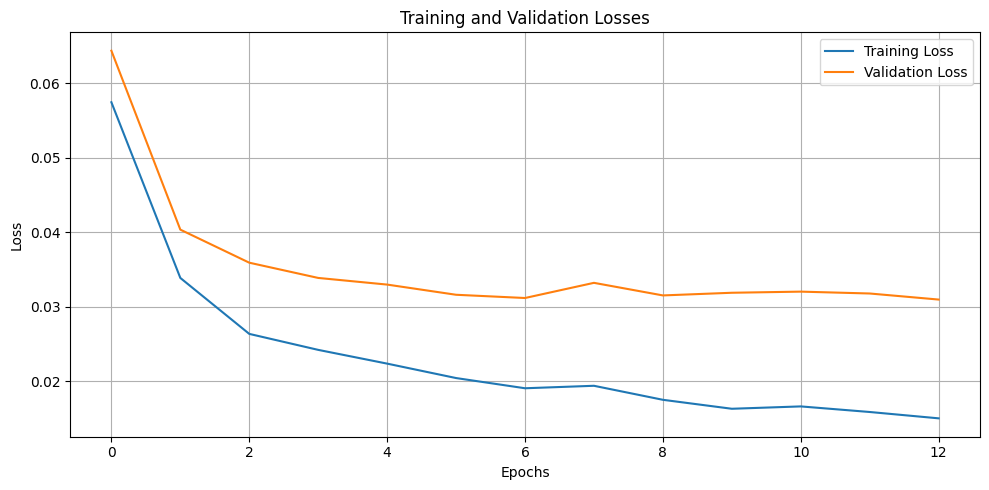

In [8]:
trainer.plot_losses()

In [9]:
trainer.test(test_loader)


Test Loss: 0.0230


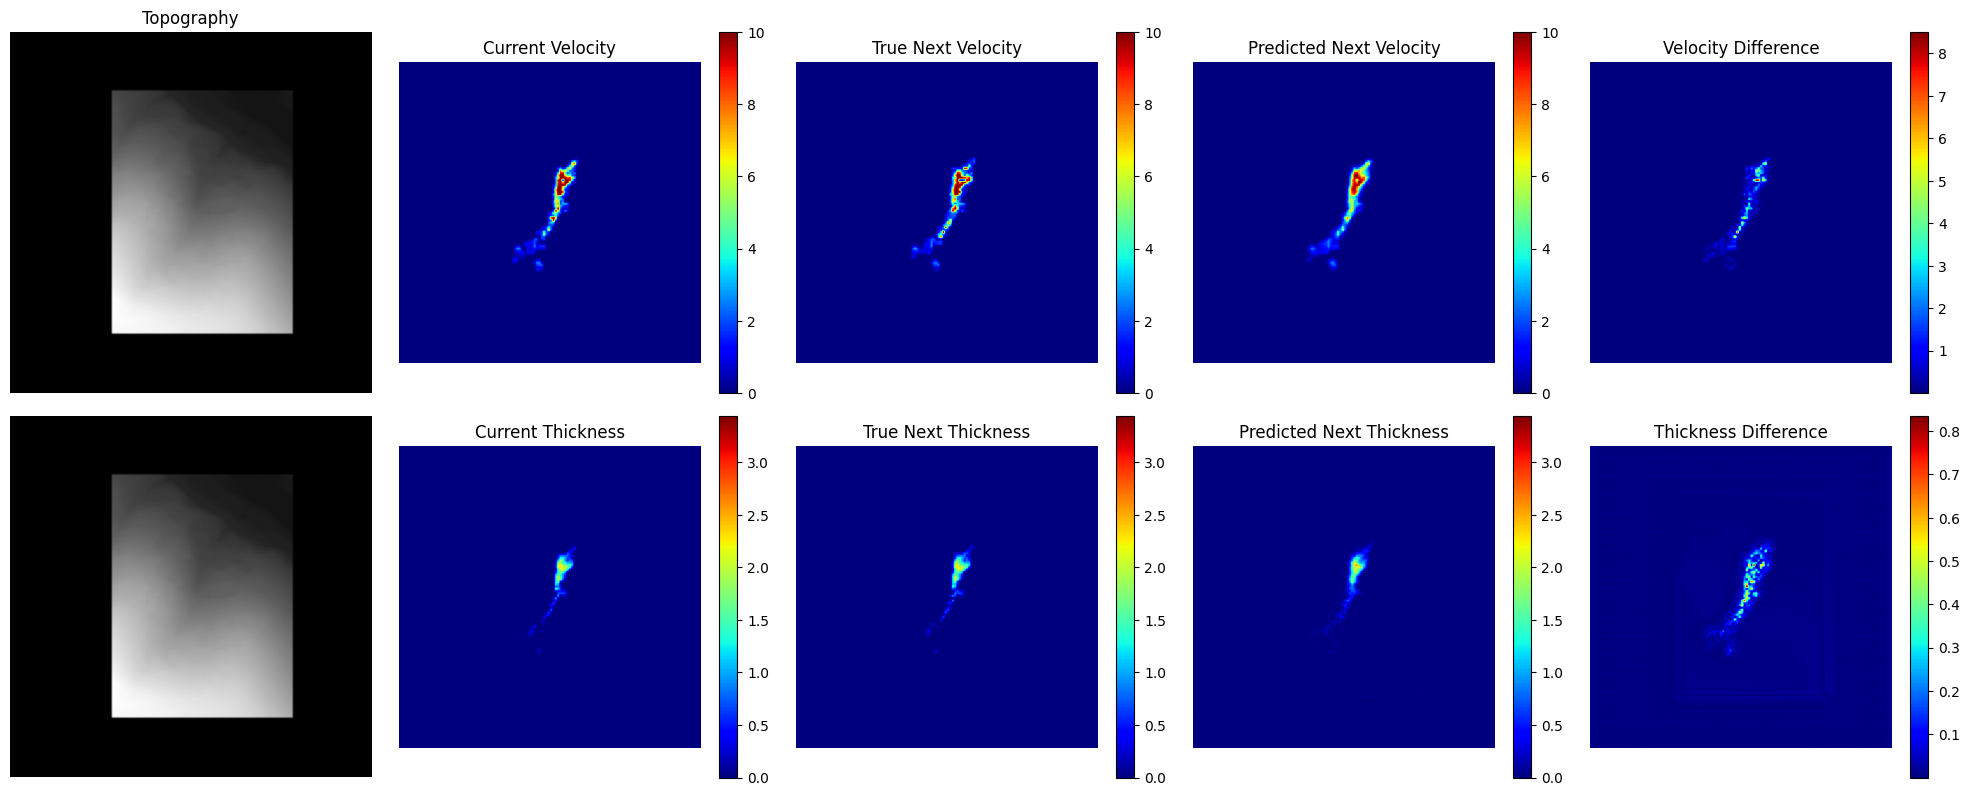

In [10]:
trainer.plot_predictions(test_loader, num_predictions=1)